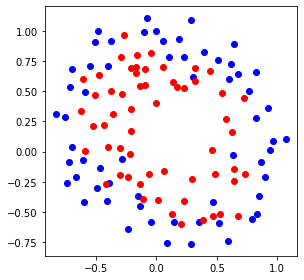

In [48]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment06/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [45]:
degree = 2
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 


 
#몇차항?
X_poly = mapFeature(pointX, pointY, degree)

# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
print(initial_theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [0]:
# Now call the optimization routine
#NOTE: This automatically picks the learning rate
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))
while 1:
  len(X_poly[0])

iter : 7194917
converge


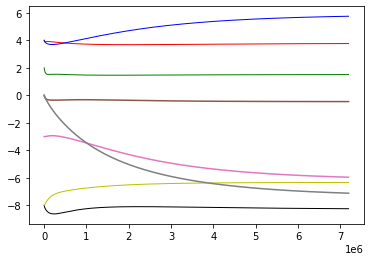

In [42]:
#x, y, label
#세타0, 세타1, 세타2
t0 = 4.0
t1 = 2.0
t2 = 4.0
t3 = -8.0
t4 = -8.0
t5 = 0.0
t6 = -3.0
t7 = 0.0
#sigma(z)
sigz = 0
#Training error
J = 0

#theta list
t0_list = []
t1_list = []
t2_list = []
t3_list = []
t4_list = []
t5_list = []
t6_list = []
t7_list = []
#error list
E = []

#learning rate alpha(a)
#0.1부터 0.001까지 /3 단위로 해봤으나 0.1, 0.03등 너무 큰 값에선 runtime warning : division zero, invalid value 등이 뜨며
#0.003에선 converge하기 위한 threshold값에 너무 빨리 도달하지만 실제로는 지그재그 형태인 것으로 추정된다
#0.001에선 아무 이상없이 threshold에 도달하였을 때 converge에 도달. 따라서 0.001이 최선의 learning rate로 보인다
a = 0.001

iter = 0
#변화가 상당히 줄어들었을 때(굉장히 작은 값의 변화) = converge
threshold = 0.0000001

while 1:
  #z = theta^T * X
  z = t0 + t1 * pointX + t2 * pointY + t3 * np.power(pointX, 2) + t4 * np.power(pointY, 2) + t5 * np.power(pointX, 3) + t6 * np.power(pointY, 3) + t7 * np.power(pointX, 2) * pointY 
  #sigma(z)
  sigz = 1 / (1 + np.exp(-z))
  #error
  J = np.mean( -1 * label * np.log(sigz) - (1 - label) * np.log(1 - sigz) )
  #Threshold check을 위한 임시 값
  tmp0 = t0
  tmp1 = t1
  tmp2 = t2
  tmp3 = t3
  tmp4 = t4
  tmp5 = t5
  tmp6 = t6
  tmp7 = t7
  #Gradient Descent
  t0 = t0 - a * np.mean(sigz - label)
  t1 = t1 - a * np.mean((sigz - label) * pointX)
  t2 = t2 - a * np.mean((sigz - label) * pointY)
  t3 = t3 - a * np.mean((sigz - label) * np.power(pointX,2))
  t4 = t4 - a * np.mean((sigz - label) * np.power(pointY,2))
  t5 = t5 - a * np.mean((sigz - label) * np.power(pointX,3))
  t6 = t6 - a * np.mean((sigz - label) * np.power(pointY,3))
  t7 = t7 - a * np.mean((sigz - label) * np.power(pointX,2) * pointY)
  #add to list
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  t3_list.append(t3)
  t4_list.append(t4)
  t5_list.append(t5)
  t6_list.append(t6)
  t7_list.append(t7)
  E.append(J)
  #Threshold check
  if abs(tmp0 - t0) < threshold and abs(tmp1 - t1) < threshold and abs(tmp2 - t2) < threshold and abs(tmp3 - t3) < threshold and abs(tmp4 - t4) < threshold and abs(tmp5 - t5) < threshold and abs(tmp6 - t6) < threshold and abs(tmp7 - t7) < threshold:
    print("iter : %d" %iter)
    print("converge")
    break

  iter += 1

t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
t3_line = plt.plot(t3_list)
t4_line = plt.plot(t4_list)
t5_line = plt.plot(t5_list)
t6_line = plt.plot(t6_list)
t7_line = plt.plot(t7_list)

plt.setp(t0_line, color = 'r', linewidth = 1)
plt.setp(t1_line, color = 'g', linewidth = 1)
plt.setp(t2_line, color = 'b', linewidth = 1)
plt.setp(t3_line, color = 'k', linewidth = 1)
plt.setp(t4_line, color = 'y', linewidth = 1)
plt.show()

In [42]:
#x, y, label
#세타0, 세타1, 세타2
t0 = 0.0
t1 = 0.0
t2 = 0.0
t3 = 0.0
Theta = np.array([t0, t1, t2, t3])
#sigma(z)
sigz = 0
#Training error
J = 0

#theta list
t0_list = []
t1_list = []
t2_list = []
t3_list = []

T_list = []
T_list2 = []
#error list
E = []

#learning rate alpha(a)
#0.1부터 0.001까지 /3 단위로 해봤으나 0.1, 0.03등 너무 큰 값에선 runtime warning : division zero, invalid value 등이 뜨며
#0.003에선 converge하기 위한 threshold값에 너무 빨리 도달하지만 실제로는 지그재그 형태인 것으로 추정된다
#0.001에선 아무 이상없이 threshold에 도달하였을 때 converge에 도달. 따라서 0.001이 최선의 learning rate로 보인다
a = 0.001

iter = 0
#변화가 상당히 줄어들었을 때(굉장히 작은 값의 변화) = converge
threshold = 0.0000001


X = np.array(np.ones(len(pointX)), pointX, pointY, pointX * pointY)
#print(np.shape(X))
#print(np.dot(X, Theta))
while 1:
  #z = theta^T * X
  z = t0 + t1 * pointX + t2 * pointY + t3 * pointX * pointY
  #sigma(z)
  sigz = 1 / (1 + np.exp(-z))
  #error
  J = np.mean( -1 * label * np.log(sigz) - (1 - label) * np.log(1 - sigz) )
  #Threshold check을 위한 임시 값
  tmp0 = t0
  tmp1 = t1
  tmp2 = t2
  tmp3 = t3
  #Gradient Descent
  t0 = t0 - a * np.mean(sigz - label)
  t1 = t1 - a * np.mean((sigz - label) * pointX)
  t2 = t2 - a * np.mean((sigz - label) * pointY)
  t3 = t3 - a * np.mean((sigz - label) * pointX * pointY)
  #add to list
  t0_list.append(t0)
  t1_list.append(t1)
  t2_list.append(t2)
  t3_list.append(t3)
  E.append(J)
  #Threshold check
  if abs(tmp0 - t0) < threshold and abs(tmp1 - t1) < threshold and abs(tmp2 - t2) < threshold and abs(tmp3 - t3) < threshold:
    print("iter : %d" %iter)
    print("converge")
    break

  iter += 1

t0_line = plt.plot(t0_list)
t1_line = plt.plot(t1_list)
t2_line = plt.plot(t2_list)
t3_line = plt.plot(t3_list)

plt.setp(t0_line, color = 'r', linewidth = 1)
plt.setp(t1_line, color = 'g', linewidth = 1)
plt.setp(t2_line, color = 'b', linewidth = 1)
plt.setp(t3_line, color = 'k', linewidth = 1)
plt.show()

ValueError: ignored

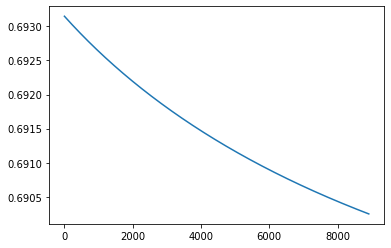

In [28]:
plt.plot(E)
plt.show()

In [5]:
#label값
l = 0
#iteration
i = 0
acc_list = []
while i < len(pointX):
  #z = t0 + t1 * pointX[i] + t2 * pointY[i] + t3 * pow(pointX[i], 2) + t4 * pow(pointY[i], 2) + t5 * np.power(pointX[i], 3)
  z = t0 + t1 * pointX[i] + t2 * pointY[i] + t3 * pointX[i] * pointY[i]
  if z > pointY[i]:
    l = 1
  else:
    l = 0
  if l == label[i]:
    acc_list.append(1)
  else:
    acc_list.append(0)

  i += 1

accuracy = acc_list.count(1) / len(acc_list)
print(accuracy * 100, "%")

47.45762711864407 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: No contour levels were found within the data range.


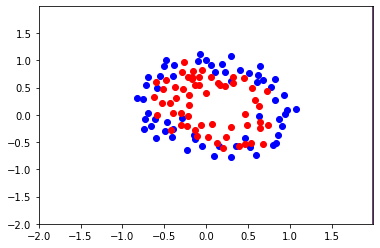

In [31]:
import math
#범위 : 30부터 100까지
X = np.arange(-2, 2, 0.01)
Y = np.arange(-2, 2, 0.01)
#이차원 배열 L(label의 리스트) = sigma(Theta ^ T * X)
L = []
L2 = []

x_range = 0
y_range = 0

#Theta ^ T * X
ttx = 0
#sigma(Theta ^ T * X)
sigttx = 0

while x_range < len(X):
  while y_range < len(Y):

    ttx = t0 + t1 * X[y_range] + t2 * Y[i] + t3 * pow(X[y_range], 2)
    
    sigttx = 1 / (1 + math.exp(-ttx))
    L2.append(sigttx)

    y_range += 1
  #L에 L2리스트를 넣어서 2차원 배열 생성
  L.append(L2)
  #print(L2[0])
  x_range += 1
  y_range = 0
  L2 = []

#X, Y를 이차원 배열로 만듦
X, Y = np.meshgrid(X, Y)
xy = np.vstack([X.ravel(), Y.ravel()])


#Colormap으로 표현
plt.contour(X, Y, L, levels = [0])
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.show()

In [0]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

In [10]:
#Load our Dataset for Logistic Regression
import pandas as pd

components = pd.read_csv('/content/drive/My Drive/AssignmentFolder/Assignment06/data-nonlinear.txt', header=None, names = ['feature 1', 'feature 2', 'faulty'])
components.head()
print(components)

     feature 1  feature 2  faulty
0     0.051267   0.699560       1
1    -0.092742   0.684940       1
2    -0.213710   0.692250       1
3    -0.375000   0.502190       1
4    -0.513250   0.465640       1
..         ...        ...     ...
113  -0.720620   0.538740       0
114  -0.593890   0.494880       0
115  -0.484450   0.999270       0
116  -0.006336   0.999270       0
117   0.632650  -0.030612       0

[118 rows x 3 columns]


In [11]:
# Get the features 
X = components.iloc[:, :2]

print(X)

     feature 1  feature 2
0     0.051267   0.699560
1    -0.092742   0.684940
2    -0.213710   0.692250
3    -0.375000   0.502190
4    -0.513250   0.465640
..         ...        ...
113  -0.720620   0.538740
114  -0.593890   0.494880
115  -0.484450   0.999270
116  -0.006336   0.999270
117   0.632650  -0.030612

[118 rows x 2 columns]


In [0]:
degree = 2

In [43]:
X_poly = mapFeature(pointX, pointY, degree)
print(X_poly)
print(X_poly.shape)

[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]
(118, 28)


In [17]:
# Get the target variable
#label
y = components.iloc[:, 2]
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
113    0
114    0
115    0
116    0
117    0
Name: faulty, Length: 118, dtype: int64


In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
def costFunc(theta, X, y):
    m = y.shape[0]
    z = X.dot(theta)
    h = sigmoid(z)
    term1 = y * np.log(h)
    term2 = (1- y) * np.log(1 - h)
    J = -np.sum(term1 + term2, axis = 0) / m
    return J 

In [22]:
# Set initial values for our parameters
initial_theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
print(initial_theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [23]:
# Now call the optimization routine
#NOTE: This automatically picks the learning rate
from scipy.optimize import minimize
res = minimize(costFunc, initial_theta, args=(X_poly, y))
print(res)

      fun: 0.2288620149645784
 hess_inv: array([[ 3.25428577e+03,  2.64156626e+03, -9.20739290e+02,
         5.16025523e+03,  1.53301246e+03, -1.20458785e+04,
         7.31797229e+03,  5.62210786e+03,  3.97532231e+03,
        -2.26290860e+04, -1.46696324e+04, -1.79405804e+04,
        -1.27337330e+04,  2.76049646e+03,  2.21535971e+04,
        -1.13291892e+04, -3.59680330e+03,  1.02507953e+04,
        -1.45383075e+04, -2.57095432e+04,  4.01371232e+04,
         1.52133033e+04,  2.63003762e+04,  1.03867402e+03,
        -9.92341203e+03,  1.93842658e+04,  2.12057348e+04,
        -4.07710801e+04],
       [ 2.64156626e+03,  2.73699370e+03, -6.03294667e+02,
         4.27353348e+03,  1.68243348e+03, -9.43238634e+03,
         4.11025598e+03,  3.27426333e+03,  2.15554714e+03,
        -1.91456610e+04, -1.16217643e+04, -1.39769131e+04,
        -9.18589920e+03,  1.24762087e+03,  1.69345885e+04,
        -8.30364307e+03, -2.32113607e+03,  8.44562703e+03,
        -1.19631691e+04, -2.12554123e+04,  3.389

In [0]:
# our optimizated coefficients
theta = res.x

In [0]:
# define a function to plot the decision boundary
def plotDecisionBoundary(theta, degree, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['good', 'faulty', 'Decision Boundary'])
    return cs

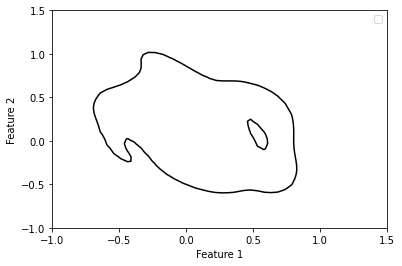

In [100]:
# Plot Decision boundary
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
#axes.legend(title='Legend', loc = 'best' )

plotDecisionBoundary(theta, degree, axes)